# **KNN**

**🧠 Question:
Use the Breast Cancer Wisconsin dataset from sklearn.datasets to classify tumors as malignant or benign using the K-Nearest Neighbors (KNN) algorithm. Your tasks are:**

##### 1) Load and explore the dataset (check number of features, classes).

##### 2) Standardize the feature values using StandardScaler.

##### 3) Split the data into training and test sets (75-25 split).

##### 4) Train a KNN classifier (start with n_neighbors=5).

##### 5) Evaluate the model using accuracy, confusion matrix, and classification report.

##### 6) (Optional) Test model performance for different values of k and plot accuracy vs. k.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
lbc = load_breast_cancer()

In [3]:
bcv = lbc.data

In [4]:
ss = StandardScaler()

In [5]:
bcv = ss.fit_transform(bcv)

In [6]:
data = pd.DataFrame(bcv, columns=lbc.feature_names)

In [7]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [8]:
data['target'] = lbc.target

In [9]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0


In [10]:
X = data.drop(columns={'target'})
y = data['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred_k = knn.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred_k)

0.958041958041958

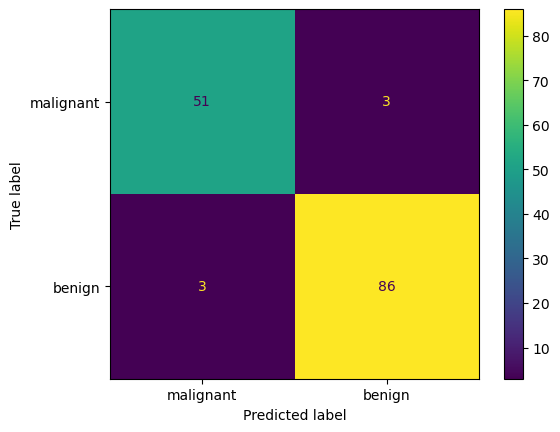

In [16]:
cm = confusion_matrix(y_test, y_pred_k)
cmd = ConfusionMatrixDisplay(cm, display_labels=lbc.target_names)
cmd.plot()

In [17]:
print(classification_report(y_test, y_pred_k))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



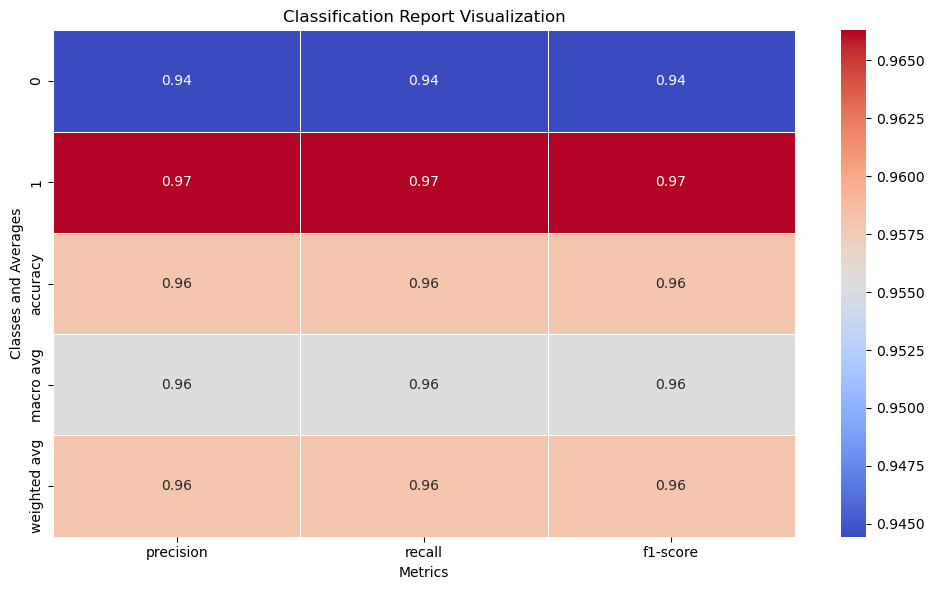

In [18]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report as a dictionary
report = classification_report(y_test, y_pred_k, output_dict=True)

# Convert to DataFrame
df = pd.DataFrame(report).transpose()

# Optional: Drop 'support' column for cleaner heatmap
df = df.drop(columns=['support'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Classification Report Visualization')
plt.ylabel('Classes and Averages')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()

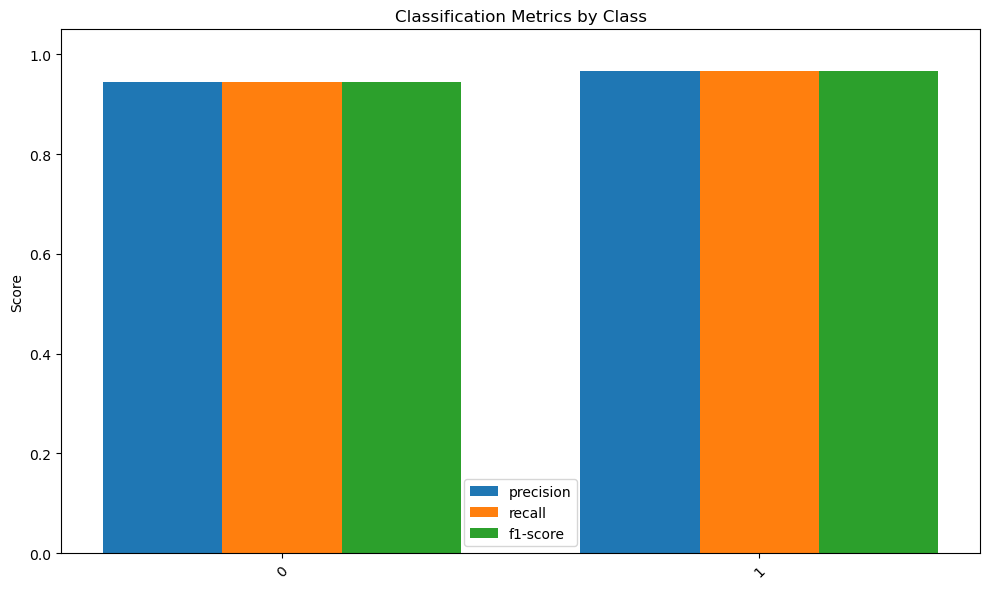

In [21]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate classification report
report = classification_report(y_test, y_pred_k, output_dict=True)

# Convert to DataFrame and filter out averages
df = pd.DataFrame(report).transpose()
df = df.drop(index=['accuracy', 'macro avg', 'weighted avg'])

# Metrics to plot
metrics = ['precision', 'recall', 'f1-score']
classes = df.index.tolist()
x = np.arange(len(classes))  # class positions

# Bar width and positions
width = 0.25

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, df[metric], width=width, label=metric)

# Formatting
plt.xticks(x + width, classes, rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.title('Classification Metrics by Class')
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
k = []
acc = []
for i in range(5, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    a = knn.score(X_test,y_test)
    acc.append(a)
    k.append(i)

In [23]:
k_a = pd.DataFrame({'K': k,
                    'Accuracy' : acc})


In [24]:
k_a['Accuracy'][4]

0.972027972027972

<Axes: xlabel='K', ylabel='Accuracy'>

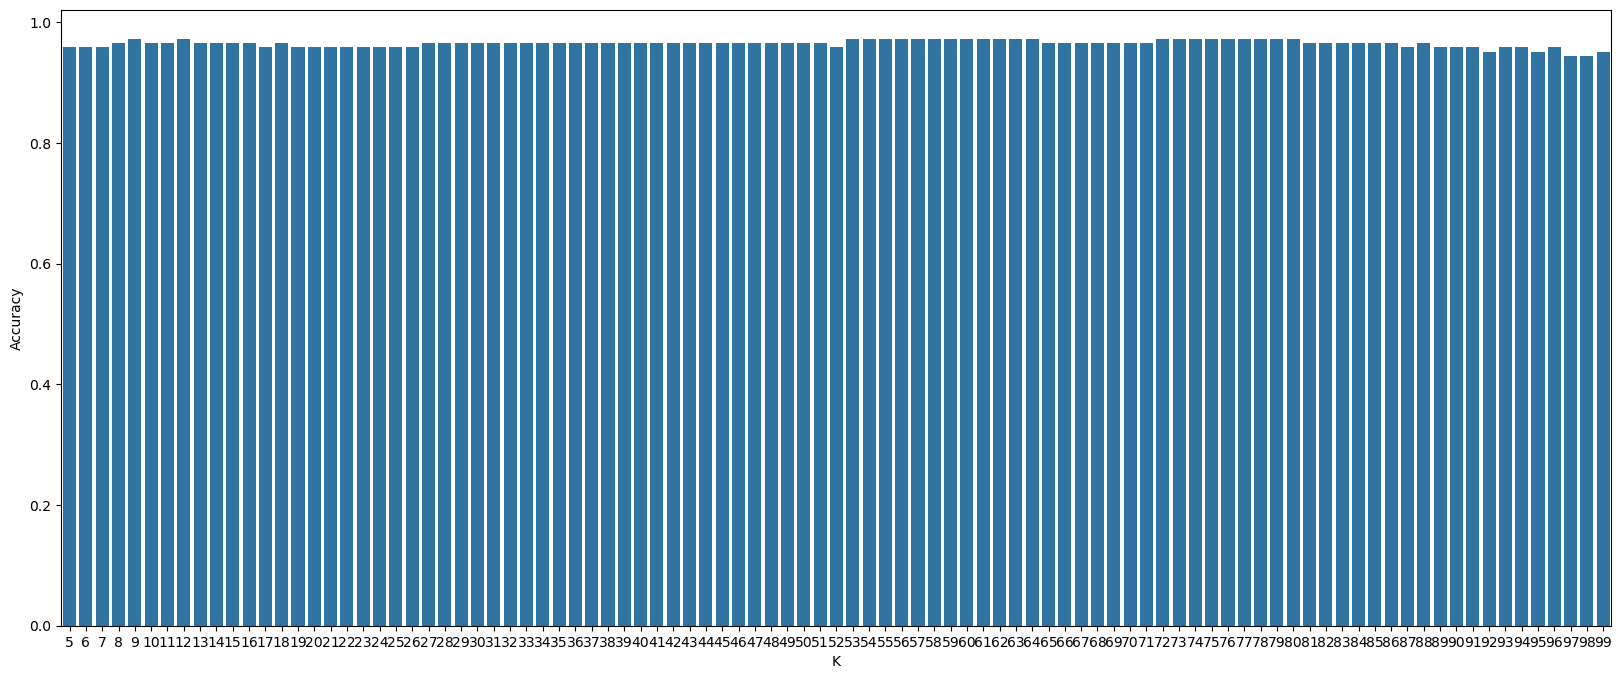

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(k_a, x='K', y="Accuracy")